In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the dataset
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
diabetes_data=pd.read_csv("./data/diabetes.csv",names=col_names)
diabetes_data.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
diabetes_data=diabetes_data.iloc[1:]
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split the dataset in features and target variable
X=diabetes_data.drop(['label','skin'],axis='columns')#features
y=diabetes_data.label#target variable


In [5]:
#splitting test and trainning datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=10)


In [6]:
from sklearn.linear_model import LogisticRegression
#instantiate the model
logreg=LogisticRegression(max_iter=1000)

#fit the model with the data

logreg.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [7]:
y_pred=logreg.predict(X_test)
y_pred


array(['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0',
       '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[354,  47],
       [ 95, 119]], dtype=int64)

Text(0.5, 257.44, 'predicted label')

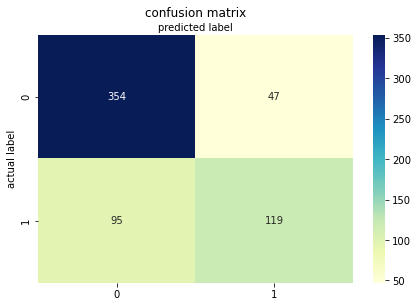

In [10]:
#plotting the confusion matrix

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix) , annot=True ,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')


In [11]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test ,y_pred))

Accuracy 0.7691056910569106


In [12]:
import pickle
import os
#saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH="models/logistic_reg.sav"
pickle.dump(logreg , open(MODEL_PATH,'wb'))

In [13]:
#predict on new data
data =[[6,0,33.6,50,148,72,0.627]]
df=pd.DataFrame(data,columns=['pregnant','insulin','bmi','age','glucose','bp','pedigree'])

new_pred=logreg.predict(df)
new_pred

array(['1'], dtype=object)